In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
# function converts txt file to csv file (longer porecessing time)
def txt_to_frm(txt_name):
	with open(txt_name +'.txt') as f:
		lines = f.readlines()

	output = pd.DataFrame()
	for riadok in lines[4:]:
		hodnota = riadok.split('\t')
		row_dict = {
			'time': float(hodnota[0]),
			'Fx': float(hodnota[1]),
			'F': float(hodnota[2]),
			#'Fz': float(hodnota[3]),
			#'Mx': float(hodnota[4]),
			#'My': float(hodnota[5]),
			#'Mz': float(hodnota[6]),
		}
		df_dictionary = pd.DataFrame([row_dict])
		output = pd.concat([output, df_dictionary], ignore_index=True)
    
	output.to_csv(txt_name +'.csv')
	#print(output.head())

In [3]:
txt_to_frm('DEFORM_Xload')
hodnoty = pd.read_csv('DEFORM_Xload.csv').set_index('time') #set time as index
hodnoty

,Unnamed: 0,Fx,F
time,,,
0.000004,0,0.0,1.746029
0.000007,1,0.0,13.845973
0.000011,2,0.0,3.321932
0.000015,3,0.0,14.288017
0.000019,4,0.0,3.866539
...,...,...,...
0.000964,375,0.0,6.742221
0.000966,376,0.0,7.374187
0.000970,377,0.0,3.043977


In [4]:

#hodnoty.drop(hodnoty.columns[[0,1]], axis=1, inplace=True)  #remove frst column
loadx=hodnoty

In [5]:
loadx.rename(columns = {'F':'x_load'}, inplace = True)

In [ ]:
result = pd.concat([loadx, loady, loadr], axis=1)

In [ ]:
result.to_csv('DEFORM_loads.csv')

In [11]:
result.info

# Vykreslovanie dat so suboru 'DEFORM_loads.csv' co je sumar zatazenia s deformácie

In [3]:
hodnoty = pd.read_csv('DEFORM_loads.csv').set_index('time') #set time as index
hodnoty

,x_load,y_load,r_load
time,,,
0.000004,1.746029,56.206326,3.038201
0.000007,13.845973,57.884044,8.770585
0.000011,3.321932,80.007799,10.453674
0.000015,14.288017,72.373589,7.581743
0.000019,3.866539,76.013511,3.322660
...,...,...,...
0.000964,6.742221,32.787559,15.765770
0.000966,7.374187,23.580216,9.424989
0.000970,3.043977,35.882665,20.700464


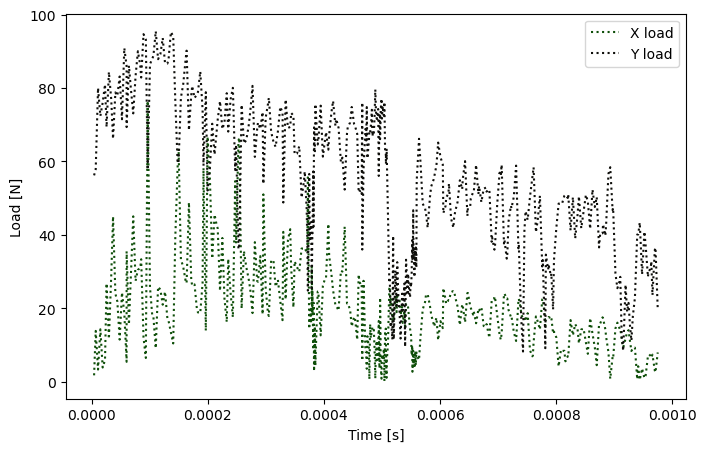

In [51]:
def plot_graph(dataset):

    fig=plt.figure(figsize=(8,5))
    plt.style.use('default')
    
    plt.plot(dataset[['x_load']], linestyle = ':', color=('#0f4f0a'))
    plt.plot(dataset[['y_load']], linestyle = ':', color=('#0f0f0b'))
    #plt.title(' Line plot')
    plt.xlabel('Time [s]')
    plt.ylabel('Load [N]')
    plt.legend(['X load','Y load','X ESW','Y ESW'])

    #plt.show()
    plt.savefig('my_plot.png')
    
plot_graph(dataset=hodnoty[['x_load','y_load']])

In [4]:
ss = hodnoty.ewm(com=20).mean() # Provide exponentially weighted (EW) calculations.

In [5]:
## fit curve to data
red_x = ss.iloc[[0,30,80,100,350,379], 0] #zredukované x na každý dany bod
red_y = ss.iloc[[0,50,100,200,265,365], 1] #zredukované x na každý dany bod

xx = red_x.index.to_numpy()
xy = red_x.to_numpy()
X_Spline = make_interp_spline(xx,xy)
# Returns evenly spaced numbers
# over a specified interval.
X_X = np.linspace(xx.min(), xx.max(), 500)
X_Y = X_Spline(X_X)

yx = red_y.index.to_numpy()
yy = red_y.to_numpy()
Y_Spline = make_interp_spline(yx,yy)
Y_X = np.linspace(yx.min(), yx.max(), 500)
Y_Y = Y_Spline(Y_X)

In [70]:
xy

array([ 1.7460295 , 17.75949699,  8.33520219])

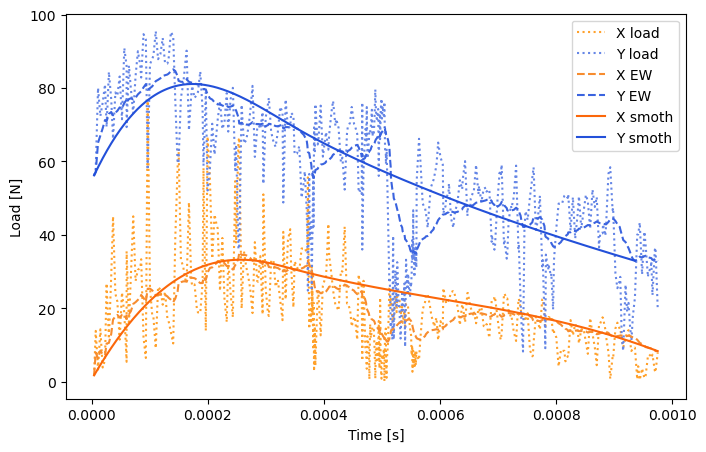

In [8]:
fig=plt.figure(figsize=(8,5))
plt.style.use('default')
plt.plot(hodnoty[['x_load']], linestyle = ':', color=('#ffa12b'))
plt.plot(hodnoty[['y_load']], linestyle = ':', color=('#6586e6'))
plt.plot(ss[['x_load']], linestyle = '--', color=('#f78c2f'))
plt.plot(ss[['y_load']], linestyle = '--', color=('#3a63df'))
plt.plot(X_X, X_Y, color=('#fb670a'))
plt.plot(Y_X, Y_Y, color=('#2350d9'))
#plt.plot(yx, yy)
plt.xlabel('Time [s]')
plt.ylabel('Load [N]')
plt.legend(['X load','Y load','X EW','Y EW', 'X smoth', 'Y smoth'])
plt.show
plt.savefig('sumarry_loads.png')

# Zobrazenie dát v jednom grafe

In [35]:
jzub = pd.read_csv('meranie_jeden_zub.csv').set_index('time') #set time as index

In [36]:
nove_jzub= jzub.index.to_frame(name='newtime').join(jzub)
nove_jzub['newtime'] = nove_jzub['newtime']-14.00918

In [42]:
#nove_jzub = nove_jzub.set_index('newtime')
#nove_jzub.drop(index=-0.00006, inplace = True)
#jzub=nove_jzub.iloc[1:]
jzub

,Fx,Fy,Fz
newtime,,,
0.00000,0.915527,9.33838,17.334000
0.00006,19.775400,13.54980,9.155270
0.00012,60.363800,29.35790,-7.324220
0.00018,119.446000,41.87010,-42.480500
0.00024,190.491000,47.72950,-56.396500
...,...,...,...
0.00240,19.104000,17.88330,0.366211
0.00246,-1.403810,10.37600,6.469730
0.00252,-6.042480,8.48389,8.422850


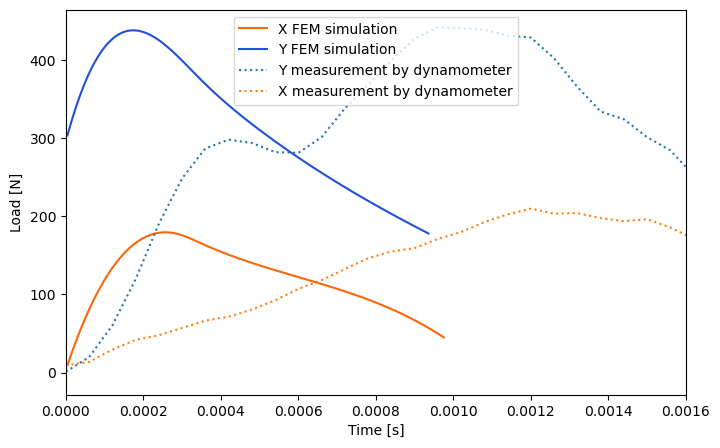

In [58]:
fig=plt.figure(figsize=(8,5))
plt.style.use('default')
#plt.plot(hodnoty[['x_load']], linestyle = ':', color=('#ffa12b'))
#plt.plot(hodnoty[['y_load']], linestyle = ':', color=('#6586e6'))
#plt.plot(ss[['x_load']], linestyle = '--', color=('#f78c2f'))
#plt.plot(ss[['y_load']], linestyle = '--', color=('#3a63df'))
plt.plot(X_X, X_Y*5.4, color=('#fb670a'))
plt.plot(Y_X, Y_Y*5.4, color=('#2350d9'))
#plt.plot(yx, yy)
plt.xlabel('Time [s]')
plt.ylabel('Load [N]')
plt.plot(jzub['Fx'], linestyle = ':')
plt.plot(jzub['Fy'], linestyle = ':')
plt.legend(['X FEM simulation','Y FEM simulation','Y measurement by dynamometer','X measurement by dynamometer'])
plt.xlim([0,0.0016])
plt.show
plt.savefig('compare_loads.png')